In [30]:
# First, import the necessary databases

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
import csv
import re
from datetime import datetime

In [32]:
# Next, parse the TXT files

In [33]:
# RIPE NCC DATAFRAME
# First of all, it is important to import the .txt file with database
# For this the path to the file is defined
# File path
filename = '/data/notebook_files/ripencc_as-set_db.txt'

# Read all lines from the opened file
with open(filename, 'r', encoding="ISO-8859-1") as file:
    lines = file.readlines()

# Initialize the data dictionary
data = {'as-set': [], 'descr': [], 'members': [], 'mnt-by': [], 'last-modified': [], 'source': []}
current_as_set = current_descr = current_members = current_mnt_by = current_last_modified = current_source = ''

# Iterates through each line
for line in lines:
    if line.startswith('as-set:'):
        if current_as_set:
            data['as-set'].append(current_as_set)
            data['descr'].append(current_descr)
            data['members'].append(current_members.rstrip(', '))
            data['mnt-by'].append(current_mnt_by)
            data['last-modified'].append(current_last_modified)
            data['source'].append(current_source)
        split_line = line.strip().split(':', 1)
        current_as_set = split_line[1].strip() if len(split_line) > 1 else ''
        current_descr = current_members = current_mnt_by = current_last_modified = current_source = ''
    elif line.startswith('descr:'):
        split_line = line.strip().split(':', 1)
        current_descr = split_line[1].strip() if len(split_line) > 1 else ''
    elif line.startswith('members:'):
        new_members = re.findall('AS[\w-]+', line)
        if new_members:
            current_members += ', '.join(new_members) + ', '
    elif line.startswith('mnt-by:'):
        split_line = line.strip().split(':', 1)
        current_mnt_by = split_line[1].strip() if len(split_line) > 1 else ''
    elif line.startswith('last-modified:'):
        split_line = line.strip().split(':', 1)
        date_str = split_line[1].strip() if len(split_line) > 1 else ''
        date_str = date_str.split('T')[0]
        if date_str:
            date_obj = datetime.strptime(date_str, '%Y-%m-%d')  # Convert to datetime object
            current_last_modified = date_obj.strftime('%d-%m-%Y')  # Convert to the desired format
    elif line.startswith('source:'):
        split_line = line.strip().split(':', 1)
        current_source = split_line[1].strip() if len(split_line) > 1 else ''

# Add the last entry
data['as-set'].append(current_as_set)
data['descr'].append(current_descr)
data['members'].append(current_members.rstrip(', '))
data['mnt-by'].append(current_mnt_by)
data['last-modified'].append(current_last_modified)
data['source'].append(current_source)

# Convert to a pandas DataFrame
df_ripe = pd.DataFrame(data)

# Function to count AS members
def count_as_members(members_str):
    if not members_str:
        return 0
    members_list = members_str.split(', ')
    return len(members_list)

# Add a new 'AS_count' column
df_ripe['AS_count'] = df_ripe['members'].apply(count_as_members)

# Strip leading/trailing whitespaces from 'as-set' values
df_ripe['as-set'] = df_ripe['as-set'].str.strip()

In [34]:
# Prints the shape of the DataFrame, where the first value corresponds to the number of rows, 
# and the second value corresponds to the number of features (columns)
df_ripe.shape

(24522, 7)

In [35]:
df_ripe

,as-set,descr,members,mnt-by,last-modified,source,AS_count
0,AS-RESTENA,Educational and research network for Luxembourg,"AS2602, AS42909, AS51966, AS-LXP, AS-VDL",AS2602-MNT,08-09-2022,RIPE,5
1,AS-TMPEBONECWIX,CWIX ASes announced to EBONE,"AS3727, AS4445, AS4610, AS4624, AS4637, AS4654...",EBONE-MNT,21-09-2001,RIPE,24
2,AS-DFNFROMCOLOGNE,ASs accepted by DFN from the University of Col...,"AS5520, AS6733",DFN-MNT,12-04-2010,RIPE,2
3,AS-NETMATTERS,NetMatters UK,"AS6765, AS3344",AS8407-MNT,21-09-2001,RIPE,2
4,AS-UDNGRAZ,UDN Graz AS Macro,"AS1113, AS1114, AS1118, AS2604, AS2036",ACONET-LIR-MNT,05-04-2017,RIPE,5
...,...,...,...,...,...,...,...
24517,AS199750:AS-ALL,,,OLIVIA-MNT,02-06-2023,RIPE,0
24518,AS197991:AS-ESPANIX,,"AS197991, AS6895",JCMQ2-MNT,02-06-2023,RIPE,2
24519,AS210125:AS-PRIAM-SET,,AS210125,mrdtr-mnt,02-06-2023,RIPE,1
24520,AS211509:AS-RUDAKI,,AS211509,RUDAKI-MNT,02-06-2023,RIPE,1


In [36]:
# APNIC DATAFRAME
# The code is exactly the same as RIPE NCC, therefore no comments will be written for this DF
filename = '/data/notebook_files/apnic_as-set_db.txt'

with open(filename,'r', encoding="ISO-8859-1",) as file:
    lines = file.readlines()

# Initialize the data dictionary
data = {'as-set': [], 'descr': [], 'members': [], 'mnt-by': [], 'last-modified': [], 'source': []}
current_as_set = current_descr = current_members = current_mnt_by = current_last_modified = current_source = ''

# Iterates through each line
for line in lines:
    if line.startswith('as-set:'):
        if current_as_set:
            data['as-set'].append(current_as_set)
            data['descr'].append(current_descr)
            data['members'].append(current_members.rstrip(', '))
            data['mnt-by'].append(current_mnt_by)
            data['last-modified'].append(current_last_modified)
            data['source'].append(current_source)
        split_line = line.strip().split(':', 1)
        current_as_set = split_line[1].strip() if len(split_line) > 1 else ''
        current_descr = current_members = current_mnt_by = current_last_modified = current_source = ''
    elif line.startswith('descr:'):
        split_line = line.strip().split(':', 1)
        current_descr = split_line[1].strip() if len(split_line) > 1 else ''
    elif line.startswith('members:'):
        new_members = re.findall('AS[\w-]+', line)
        if new_members:
            current_members += ', '.join(new_members) + ', '
    elif line.startswith('mnt-by:'):
        split_line = line.strip().split(':', 1)
        current_mnt_by = split_line[1].strip() if len(split_line) > 1 else ''
    elif line.startswith('last-modified:'):
        split_line = line.strip().split(' ', 1)
        date_str = split_line[1] if len(split_line) > 1 else ''
        date_str = date_str.split('T')[0] # Take only the date part before 'T'
        date_str = date_str.strip() # Remove leading and trailing whitespaces
        if date_str:
            date_obj = datetime.strptime(date_str, '%Y-%m-%d') # Convert to datetime object
            current_last_modified = date_obj.strftime('%d-%m-%Y') # Convert to the desired format
    elif line.startswith('source:'):
        split_line = line.strip().split(':', 1)
        current_source = split_line[1].strip() if len(split_line) > 1 else ''

# Add the last entry
data['as-set'].append(current_as_set)
data['descr'].append(current_descr)
data['members'].append(current_members.rstrip(', '))
data['mnt-by'].append(current_mnt_by)
data['last-modified'].append(current_last_modified)
data['source'].append(current_source)

# Convert to a pandas DataFrame
df_apnic = pd.DataFrame(data)

# Function to count AS members
def count_as_members(members_str):
    if not members_str:
        return 0
    members_list = members_str.split(', ')
    return len(members_list)

# Add a new 'AS_count' column
df_apnic['AS_count'] = df_apnic['members'].apply(count_as_members)

# Strip leading/trailing whitespaces from 'as-set' values
df_apnic['as-set'] = df_apnic['as-set'].str.strip()

In [37]:
df_apnic.shape

(3653, 7)

In [38]:
df_apnic

,as-set,descr,members,mnt-by,last-modified,source,AS_count
0,AS-GIPAU,GIP AU AS Macro,"AS4805, AS4736, AS4744, AS4752, AS7567, AS7617...",GLOBAL-ONE-ANZOPS-AP,04-09-2008,APNIC,7
1,AS-PDOXUPLINKS,All upstream Providers for Paradox Digital,"AS-PDOXUPLINKAU, AS-PDOXUPLINKUS",PDOX-NOC-AP,04-09-2008,APNIC,2
2,AS-PDOXPEERP,Peering points with Paradox Digital,"AS65350, AS7653",PDOX-NOC-AP,04-09-2008,APNIC,2
3,AS-PDOXUPLINKUS,US based upstream Providers for Paradox Digital,"AS7657, AS4565, AS5650, AS6461",PDOX-NOC-AP,04-09-2008,APNIC,4
4,AS-PDOXUPLINKAU,AU based upstream Providers for Paradox Digital,"AS703, AS1221, AS2764, AS7474",PDOX-NOC-AP,04-09-2008,APNIC,4
...,...,...,...,...,...,...,...
3648,AS17456:AS-CUSTOMERS,PDS Tranist Customers ASNs,AS142139,MAINT-GU-PDSGUAM,02-06-2023,APNIC,1
3649,AS17456:AS-ALL,PDS ASN and Its Transit Customer ASNs,"AS17456, AS17456, AS-CUSTOMERS",MAINT-GU-PDSGUAM,02-06-2023,APNIC,3
3650,AS142485:AS-SUNDARAMBROADBAND,SUNDARAM BROADBAND PRIVATE LIMITED,"AS142485, AS141560",MAINT-IN-SUNDARAMBROADBAND,02-06-2023,APNIC,2
3651,AS137134:AS-TRIPLE,Triple Play Broadband Services India Pvt Ltd,AS137134,MAINT-IN-TRIPLE,02-06-2023,APNIC,1


In [39]:
# ARIN DATAFRAME
# The code is exactly the same as RIPE NCC (with a minor difference), therefore no comments will be written for this DF
filename = '/data/notebook_files/arin_as-set_db.txt'

with open(filename,'r', encoding="ISO-8859-1",) as file:
    lines = file.readlines()

# Initialize the data dictionary
data = {'as-set': [], 'descr': [], 'members': [], 'mnt-by': [], 'last-modified': [], 'source': []}
current_as_set = current_descr = current_members = current_mnt_by = current_last_modified = current_source = ''

# Iterates through each line
for line in lines:
    if line.startswith('as-set:'):
        if current_as_set:
            data['as-set'].append(current_as_set)
            data['descr'].append(current_descr)
            data['members'].append(current_members.rstrip(', '))
            data['mnt-by'].append(current_mnt_by)
            data['last-modified'].append(current_last_modified)
            data['source'].append(current_source)
        split_line = line.strip().split(':', 1)
        current_as_set = split_line[1].strip() if len(split_line) > 1 else ''
        current_descr = current_members = current_mnt_by = current_last_modified = current_source = ''
    elif line.startswith('descr:'):
        split_line = line.strip().split(':', 1)
        current_descr = split_line[1].strip() if len(split_line) > 1 else ''
    elif line.startswith('members:'):
        new_members = re.findall('AS[\w-]+', line)
        if new_members:
            current_members += ', '.join(new_members) + ', '
    elif line.startswith('mnt-by:'):
        split_line = line.strip().split(':', 1)
        current_mnt_by = split_line[1].strip() if len(split_line) > 1 else ''
    elif 'changed:' in line and not current_last_modified:
        split_line = line.split('changed:')[1].strip().split(' ')
        if len(split_line) > 1:  # if there is email and date
            date_str = split_line[1].strip()  # get the date string and strip any leading or trailing spaces
            if date_str and len(date_str) == 8:  # check if date_str is not empty and if it's the correct length
                try:
                    date_obj = datetime.strptime(date_str, '%Y%m%d')  # convert to datetime object
                    current_last_modified = date_obj.strftime('%d-%m-%Y')  # convert to the desired format
                except ValueError:
                    print(f"Failed to parse date: {date_str}")
                    current_last_modified = ''
    elif line.startswith('source:'):
        split_line = line.strip().split(':', 1)
        current_source = split_line[1].strip() if len(split_line) > 1 else ''

# Add the last entry
data['as-set'].append(current_as_set)
data['descr'].append(current_descr)
data['members'].append(current_members.rstrip(', '))
data['mnt-by'].append(current_mnt_by)
data['last-modified'].append(current_last_modified)
data['source'].append(current_source)

# Convert to a pandas DataFrame
df_arin = pd.DataFrame(data)

# Function to count AS members
def count_as_members(members_str):
    if not members_str:
        return 0
    members_list = members_str.split(', ')
    return len(members_list)

# Add a new 'AS_count' column
df_arin['AS_count'] = df_arin['members'].apply(count_as_members)

# Strip leading/trailing whitespaces from 'as-set' values
df_arin['as-set'] = df_arin['as-set'].str.strip()

In [40]:
df_arin.shape

(3633, 7)

In [41]:
df_arin

,as-set,descr,members,mnt-by,last-modified,source,AS_count
0,AS1001:AS-ACI,Academy City Internet LLC,"AS1001, AS1040, AS969",MNT-ACIL-25,,ARIN,3
1,AS-1002-CUSTOMERS,Customers,"AS1002, AS147297, AS210527, AS44570, AS-ROUTE4...",MNT-VHL-190,,ARIN,9
2,AS1007:AS-PEERS,"Hotel de la collectivite de Saint-Martin, rue ...",,MNT-COLLE-72,,ARIN,0
3,AS1011:AS-SET,AccutarBio,AS1011,MNT-ABC-630,,ARIN,1
4,AS10248:AS-ALL,"Blue Ridge Bankshares, Inc.","AS10248, AS-CONE",MNT-BRB-41,,ARIN,2
...,...,...,...,...,...,...,...
3628,AS-ZOOCE,Zooce,AS398307,MNT-UIS-72,,ARIN,1
3629,AS-ZOOMINGWORK-LLC,PloxHost by ZoomingWork LLC.,"AS31786, AS203458, AS26930, AS210691, AS137509...",MNT-ZL-92,,ARIN,6
3630,AS-ZTVI,"ZTVI - ForwardingPlane, LLC",AS19625,MNT-FL-727,,ARIN,1
3631,WAVEFORM-CUSTOMERS,Waveform Technology LLC Customers,"AS19383, AS11088, AS19197",MNT-WFRM,24-11-2010,ARIN,3


In [42]:
# LAPNIC DATAFRAME
# The code is exactly the same as RIPE NCC, therefore no comments will be written for this DF
filename = '/data/notebook_files/lacnic_as-set_db.txt'

with open(filename,'r', encoding="ISO-8859-1",) as file:
    lines = file.readlines()

# Initialize the data dictionary
data = {'as-set': [], 'descr': [], 'members': [], 'mnt-by': [], 'last-modified': [], 'source': []}
current_as_set = current_descr = current_members = current_mnt_by = current_last_modified = current_source = ''

# Iterates through each line
for line in lines:
    if line.startswith('as-set:'):
        if current_as_set:
            data['as-set'].append(current_as_set)
            data['descr'].append(current_descr)
            data['members'].append(current_members.rstrip(', '))
            data['mnt-by'].append(current_mnt_by)
            data['last-modified'].append(current_last_modified)
            data['source'].append(current_source)
        split_line = line.strip().split(':', 1)
        current_as_set = split_line[1].strip() if len(split_line) > 1 else ''
        current_descr = current_members = current_mnt_by = current_last_modified = current_source = ''
    elif line.startswith('descr:'):
        split_line = line.strip().split(':', 1)
        current_descr = split_line[1].strip() if len(split_line) > 1 else ''
    elif line.startswith('members:'):
        new_members = re.findall('AS[\w-]+', line)
        if new_members:
            current_members += ', '.join(new_members) + ', '
    elif line.startswith('mnt-by:'):
        split_line = line.strip().split(':', 1)
        current_mnt_by = split_line[1].strip() if len(split_line) > 1 else ''
    # also field overloading will removed, and e-mail will be dropped    
    elif 'changed:' in line:
        split_line = line.split('changed:')[1].strip().split(' ')
        if len(split_line) > 1:  # if there is email and date
            date_str = split_line[1].strip()  # get the date string and strip any leading or trailing spaces
            if date_str and len(date_str) == 8:  # check if date_str is not empty and if it's the correct length
                    date_obj = datetime.strptime(date_str, '%Y%m%d')  # convert to datetime object
                    current_last_modified = date_obj.strftime('%d-%m-%Y')  # convert to the desired format
    elif line.startswith('source:'):
        split_line = line.strip().split(':', 1)
        current_source = split_line[1].strip() if len(split_line) > 1 else ''

# Add the last entry
data['as-set'].append(current_as_set)
data['descr'].append(current_descr)
data['members'].append(current_members.rstrip(', '))
data['mnt-by'].append(current_mnt_by)
data['last-modified'].append(current_last_modified)
data['source'].append(current_source)

# Convert to a pandas DataFrame
df_lapnic = pd.DataFrame(data)

# Function to count AS members
def count_as_members(members_str):
    if not members_str:
        return 0
    members_list = members_str.split(', ')
    return len(members_list)

# Add a new 'AS_count' column
df_lapnic['AS_count'] = df_lapnic['members'].apply(count_as_members)

# Strip leading/trailing whitespaces from 'as-set' values
df_lapnic['as-set'] = df_lapnic['as-set'].str.strip()

In [43]:
df_lapnic.shape

(1149, 7)

In [44]:
df_lapnic

,as-set,descr,members,mnt-by,last-modified,source,AS_count
0,AS4270:AS-UNIS1,Red de Interconexion Universitaria,"AS3449, AS5692, AS14845, AS27770, AS27790, AS2...",MNT-AR-RIUN-LACNIC,03-03-2020,LACNIC,13
1,AS4270:AS-LACNIC,Red de Interconexion Universitaria,AS52224,MNT-AR-RIUN-LACNIC,03-03-2020,LACNIC,1
2,AS16814:AS-IPLAN,NSS S.A.,"AS16814, AS16814, AS-CUSTOMERS",MNT-AR-NSSA-LACNIC,20-10-2021,LACNIC,3
3,AS52332:AS-BHB,CABASE Camara Arg de Base de Datos y Serv en L...,AS52332,MNT-AR-CCAB-LACNIC,02-04-2020,LACNIC,1
4,AS52370:AS-DLC,CABASE Camara Arg de Base de Datos y Serv en L...,AS52370,MNT-AR-CCAB-LACNIC,02-04-2020,LACNIC,1
...,...,...,...,...,...,...,...
1144,AS266769:AS-GOOGLE,ISPCOM S.A.,AS15169,MNT-AR-ISSA17-LACNIC,01-06-2023,LACNIC,1
1145,AS269905:AS-CUSTOMERS,COOPERATIVA COLONIZADORA MULTIACTIVA FERNHEIM ...,AS269905,MNT-PY-CFLT-LACNIC,02-06-2023,LACNIC,1
1146,AS266769:AS-ISPCOM,ISPCOM S.A.,"AS266769, AS266769, AS-Silica, AS266769, AS-TE...",MNT-AR-ISSA17-LACNIC,01-06-2023,LACNIC,9
1147,AS265864:AS-CLIENTES,LINK Telecom S.A.,AS262183,MNT-PY-LTSA-LACNIC,01-06-2023,LACNIC,1


In [45]:
# AFRINIC DATAFRAME
# The code is exactly the same as RIPE NCC, therefore no comments will be written for this DF
filename = '/data/notebook_files/afrinic_as-set_db.txt'

with open(filename,'r', encoding="ISO-8859-1",) as file:
    lines = file.readlines()

# Initialize the data dictionary
data = {'as-set': [], 'descr': [], 'members': [], 'mnt-by': [], 'last-modified': [], 'source': []}
current_as_set = current_descr = current_members = current_mnt_by = current_last_modified = current_source = ''

# Iterates through each line
for line in lines:
    if line.startswith('as-set:'):
        if current_as_set:
            data['as-set'].append(current_as_set)
            data['descr'].append(current_descr)
            data['members'].append(current_members.rstrip(', '))
            data['mnt-by'].append(current_mnt_by)
            data['last-modified'].append(current_last_modified)
            data['source'].append(current_source)
        split_line = line.strip().split(':', 1)
        current_as_set = split_line[1].strip() if len(split_line) > 1 else ''
        current_descr = current_members = current_mnt_by = current_last_modified = current_source = ''
    elif line.startswith('descr:'):
        split_line = line.strip().split(':', 1)
        current_descr = split_line[1].strip() if len(split_line) > 1 else ''
    elif line.startswith('members:'):
        new_members = re.findall('AS[\w-]+', line)
        if new_members:
            current_members += ', '.join(new_members) + ', '
    elif line.startswith('mnt-by:'):
        split_line = line.strip().split(':', 1)
        current_mnt_by = split_line[1].strip() if len(split_line) > 1 else ''
    # also field overloading will removed, and e-mail will be dropped
    elif 'changed:' in line:
        split_line = line.split('changed:')[1].strip().split(' ')
        if len(split_line) > 1:  # if there is email and date
            date_str = split_line[1].strip()  # get the date string and strip any leading or trailing spaces
            if date_str and len(date_str) == 8:  # check if date_str is not empty and if it's the correct length
                    date_obj = datetime.strptime(date_str, '%Y%m%d')  # convert to datetime object
                    current_last_modified = date_obj.strftime('%d-%m-%Y')  # convert to the desired format
    elif line.startswith('source:'):
        split_line = line.strip().split(':', 1)
        current_source = split_line[1].strip() if len(split_line) > 1 else ''

# Add the last entry
data['as-set'].append(current_as_set)
data['descr'].append(current_descr)
data['members'].append(current_members.rstrip(', '))
data['mnt-by'].append(current_mnt_by)
data['last-modified'].append(current_last_modified)
data['source'].append(current_source)

# Convert to a pandas DataFrame
df_afrinic = pd.DataFrame(data)

# Function to count AS members
def count_as_members(members_str):
    if not members_str:
        return 0
    members_list = members_str.split(', ')
    return len(members_list)

# Add a new 'AS_count' column
df_afrinic['AS_count'] = df_afrinic['members'].apply(count_as_members)

# Strip leading/trailing whitespaces from 'as-set' values
df_afrinic['as-set'] = df_afrinic['as-set'].str.strip()

In [46]:
df_afrinic.shape

(1008, 7)

In [47]:
df_afrinic

,as-set,descr,members,mnt-by,last-modified,source,AS_count
0,AS-RAYA,Vodafone Data customers announced to Transit P...,"AS15804, AS24835, AS25362, AS20484, AS2561, AS...",RAYA-MNT,29-09-2022,AFRINIC,59
1,AS-IKATELNET,IKATEL SA / MALIAN GLOBAL SERVICE PROVIDER,"AS30985, AS36864",MNT-IKATEL,26-08-2005,AFRINIC,2
2,as-jambonet,Telkom Kenya Jambonet network,,KPTC-MNT,12-11-2018,AFRINIC,0
3,AS33788:AS-Customer1,peer for AS33788,"AS33788, AS36972",KANARTEL-MNT,11-09-2007,AFRINIC,2
4,AS33788:AS-Customer2,peer for AS33788,"AS33788, AS36998",KANARTEL-MNT,07-02-2008,AFRINIC,2
...,...,...,...,...,...,...,...
1003,AS-3576,Accenture JHB,,ACCELERIT-MNT,31-05-2023,AFRINIC,0
1004,AS-SET-AFRINET,Kinshasa Afrinet sa AS-SET,AS37415,AFRINET-MNT,31-05-2023,AFRINIC,1
1005,AS-328700,TISPA-CDN,"AS328700, AS20940",FH1MD5-MNT,31-05-2023,AFRINIC,2
1006,as-329236,Teltwine Networks Limited,,TNL5-MNT,01-06-2023,AFRINIC,0


In [48]:
# All dataframes will be combined to a single dataframe
df = pd.concat([df_ripe, df_apnic, df_arin, df_lapnic, df_afrinic]).reset_index(drop=True)

In [49]:
df.shape

(33965, 7)

In [50]:
#The dataframe will be described here for analysis
df.describe

<bound method NDFrame.describe of                   as-set                                              descr  \
0             AS-RESTENA    Educational and research network for Luxembourg   
1        AS-TMPEBONECWIX                       CWIX ASes announced to EBONE   
2      AS-DFNFROMCOLOGNE  ASs accepted by DFN from the University of Col...   
3          AS-NETMATTERS                                      NetMatters UK   
4             AS-UDNGRAZ                                  UDN Graz AS Macro   
...                  ...                                                ...   
33960            AS-3576                                      Accenture JHB   
33961     AS-SET-AFRINET                         Kinshasa Afrinet sa AS-SET   
33962          AS-328700                                          TISPA-CDN   
33963          as-329236                          Teltwine Networks Limited   
33964             as-mtn                                     For MTN as-set   

                 

In [51]:
# Find the instances with no members, i.e. empty
no_members = df[df['members'].str.len() == 0]

In [52]:
# Here the list of empty members will be printed
no_members

,as-set,descr,members,mnt-by,last-modified,source,AS_count
275,as-LevelThreeEU,European Level3 Macro,,LEVEL3-MNT,01-05-2002,RIPE,0
282,AS-ISEUROPE,"old macro, see AS4589 and AS-EASYNET for curre...",,EASYNET-DE-MNT,16-05-2003,RIPE,0
350,AS-CASTEL,Essent Kabelcom Internet AS Macro,,CASTEL-MNT,06-12-2006,RIPE,0
382,AS-SILVERCOM,ASes exported by SILVERCOM to the world,,KIEV-PAGE-MNT,16-10-2009,RIPE,0
479,AS-SUNRISE,sunrise / TDC Switzerland AG,,AS6730-MNT,11-01-2002,RIPE,0
...,...,...,...,...,...,...,...
33950,AS-AMS-IX-LAG-RS-SETS-V6,AMS-IX LAG route server (37783) IPv6 announcem...,,AFRINIC-AMSIX-MNT,15-05-2023,AFRINIC,0
33955,AS-SET-POWERNET,POWERNET AS SET,,POWERNET-LIBERIA-MNT,24-05-2023,AFRINIC,0
33960,AS-3576,Accenture JHB,,ACCELERIT-MNT,31-05-2023,AFRINIC,0
33963,as-329236,Teltwine Networks Limited,,TNL5-MNT,01-06-2023,AFRINIC,0


In [53]:
# As it is visible, 3133 as-set has no members

In [54]:
# The biggest as-set will be identified here
max_as_set = df.loc[df['AS_count'].idxmax()]
print("Biggest AS-SET in terms of AS_count:")
print(max_as_set)

Biggest AS-SET in terms of AS_count:
as-set                                            AS-UBNIX-MEMBERS
descr            Ukrainian Backbone Networks Internet Exchange ...
members          AS35336, AS398112, AS44884, AS138889, AS35549,...
mnt-by                                                   MNT-UBNIX
last-modified                                           02-06-2023
source                                                        RIPE
AS_count                                                     19978
Name: 12157, dtype: object


In [55]:
# Check for duplicates
duplicates = df.duplicated()

# Print the duplicates
print(df[duplicates])

Empty DataFrame
Columns: [as-set, descr, members, mnt-by, last-modified, source, AS_count]
Index: []


In [56]:
# As it can be seen, the dataframe does not have dublicates

In [57]:
# Here, statistics will be calculated. To be more precise, we will determine the mean, median, standard deviation, and range of the number of members.mean = np.mean(df['AS_count'])
# Calculate the statistics
mean = np.mean(df['AS_count'])
median = np.median(df['AS_count'])
std = np.std(df['AS_count'])
min_num = min(df['AS_count'])
max_num = max(df['AS_count'])
range_num = max_num - min_num

# Print the results
print("Mean number of members: ", mean)
print("Median number of members: ", median)
print("Standard deviation of members: ", std)
print("Range of number of members: ", range_num)

Mean number of members:  12.638716325629325
Median number of members:  2.0
Standard deviation of members:  142.17666483772567
Range of number of members:  19978


In [58]:
# This function will calculate the 'cone' attribute
def calculate_cone(as_set, df):
    # This list will be used to keep track of AS-Sets that have been visited during the iterations. 
    visited = set()
    # This list will be used to store the unique AS numbers found during the traversal.
    ases = set()
    # The queue will be used for the breadth-first search to iterate through AS-Sets
    queue = [as_set]

    while queue:
        # This line pops the first element from the queue list and assigns it to the variable current. 
        current = queue.pop(0)
        # This if statement checks if the current AS-Set (current) has not been visited yet 
        # and is present in the df['as-set'] column. 
        # If both conditions are true, it proceeds with further calculations.
        if current not in visited and current in df['as-set'].values:
            # AS-Set is marked as visited 
            visited.add(current)
            # The 'members' value from the DF associated with the current AS-Set.
            members_str = df.loc[df['as-set'] == current, 'members'].values[0]
            # The 'members' value is split into a list of individual members
            members = members_str.split(', ')
            
            #The code iterates through each member in the list and checks if it represents an AS number. 
            for member in members:
                #If it is an AS number, it is added to the ases set. 
                if member.startswith(('AS', 'as')) and member[2:].isdigit():
                    ases.add(member)
                # If it is another AS-SET and has not been visited yet, it is added to the queue for further BFS traversal.
                elif member not in visited: 
                    queue.append(member)
    return ases
# Here 'cone' attribute is calculated and applied to the dataframe
df['cone'] = df['as-set'].apply(lambda as_set: len(calculate_cone(as_set, df)))

In [59]:
# Save the dataframe
df.to_csv('df_for.csv', index=False)

In [60]:
# drop instances with 'AS_Count' = 0
df = df[df['AS_count'] != 0]

# re-arrange the numbering
df.reset_index(drop=True, inplace=True)

In [61]:
# This part aims to create samples by dividing the data into quantiles based on the column and then selecting a number of samples 
# from each quantile. 
def quantile_sample(df, column, sample_size_per_quantile):
    samples = []
    quantiles = np.linspace(0, 1, 6)
    for i in range(len(quantiles) - 1):
        condition = (df[column] >= df[column].quantile(quantiles[i])) & \
                    (df[column] < df[column].quantile(quantiles[i + 1]))
        samples_subset = df[condition]
        if not samples_subset.empty:  # Check if samples_subset is not empty
            samples.append(samples_subset.sample(n=min(sample_size_per_quantile, len(samples_subset)), replace=True))  
    return pd.concat(samples)
# This part creates samples by grouping the data based on the 'source' and then selecting a specified number of samples 
# from each source group.
def source_sample(df, sample_size_per_source):
    return df.groupby('source').apply(lambda x: x.sample(n=min(sample_size_per_source, len(x)), replace=True)).reset_index(drop=True)

# Desired total samples
total_samples = 2368

# The oversampling factor used to increase the number of samples.
oversample_factor = 2

# Calculate samples per column with oversampling
samples_per_column = total_samples * oversample_factor

# Calculate samples per quantile
quantiles = 5
samples_per_quantile = samples_per_column // quantiles

# Quantile samples
cone_samples = quantile_sample(df, 'cone', samples_per_quantile)
AS_count_samples = quantile_sample(df, 'AS_count', samples_per_quantile)
num_samples = pd.concat([cone_samples, AS_count_samples])

# Source samples
unique_sources = df['source'].nunique()
samples_per_source = samples_per_column // unique_sources
source_samples = source_sample(df, samples_per_source)

# Combine all samples
all_samples = pd.concat([num_samples, source_samples])

# Draw the desired number of samples from all samples
df_for_classification = all_samples.sample(n=total_samples, replace=True).reset_index(drop=True)

In [62]:
# Save the dataframe
df_for_classification.to_csv('df_for_classification.csv', index=False)

Scatter plot displaying AS-Sets with outliers


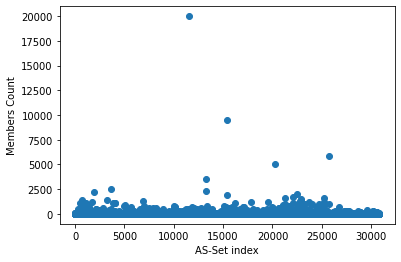

In [63]:
df_backup=df
plt.scatter(df.index, df['AS_count'])
plt.xlabel('AS-Set index')
plt.ylabel('Members Count')
plt.show()
print('Scatter plot displaying AS-Sets with outliers')

Scatter plot displaying AS-Sets with outliers


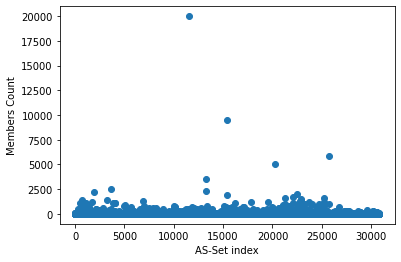

In [64]:
df_backup=df
plt.scatter(df.index, df['AS_count'])
plt.xlabel('AS-Set index')
plt.ylabel('Members Count')
plt.show()
print('Scatter plot displaying AS-Sets with outliers')

Scatter plot illustrating the distribution of AS-Sets with "AS_Count" below 500


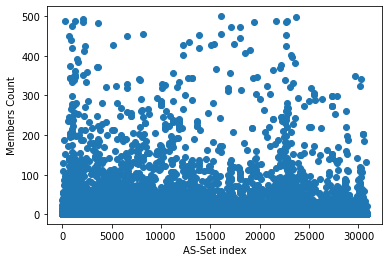

In [65]:
df = df[df['AS_count'] <= 500]
plt.scatter(df.index, df['AS_count'])
plt.xlabel('AS-Set index')
plt.ylabel('Members Count')
plt.show()
print('Scatter plot illustrating the distribution of AS-Sets with "AS_Count" below 500')

Scatter plot illustrating the distribution of AS-Sets with "AS_Count" below 100


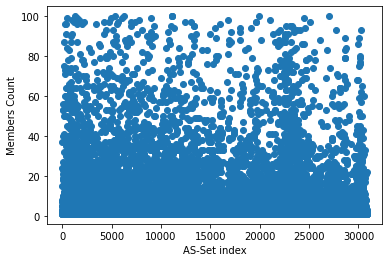

In [66]:
df = df[df['AS_count'] <= 100]
plt.scatter(df.index, df['AS_count'])
plt.xlabel('AS-Set index')
plt.ylabel('Members Count')
plt.show()
print('Scatter plot illustrating the distribution of AS-Sets with "AS_Count" below 100')

Scatter plot illustrating the distribution of AS-Sets based on "cone" attribute


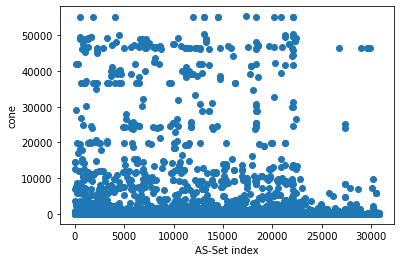

In [67]:
df=df_backup
plt.scatter(df.index, df['cone'])
plt.xlabel('AS-Set index')
plt.ylabel('cone')
plt.show()
print('Scatter plot illustrating the distribution of AS-Sets based on "cone" attribute')

Scatter plot illustrating the distribution of AS-Sets based on "cone" attribute value below 10000


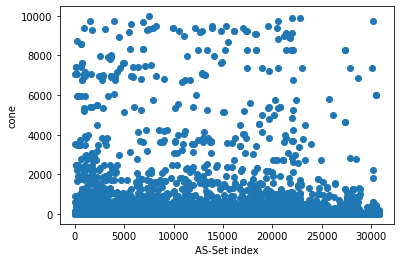

In [68]:
df = df[df['cone'] <= 10000]
plt.scatter(df.index, df['cone'])
plt.xlabel('AS-Set index')
plt.ylabel('cone')
plt.show()
print('Scatter plot illustrating the distribution of AS-Sets based on "cone" attribute value below 10000')

Scatter plot illustrating the distribution of AS-Sets based on "cone" attribute value below 150


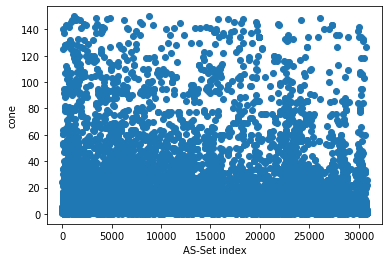

In [69]:
df = df[df['cone'] <= 150]
plt.scatter(df.index, df['cone'])
plt.xlabel('AS-Set index')
plt.ylabel('cone')
plt.show()
print('Scatter plot illustrating the distribution of AS-Sets based on "cone" attribute value below 150')